### Data

Our project focuses around how different music affects the mood of different listeners. The data set that we have chosen tracks the mood of listeners for various different songs. It also keeps track of other details and features of the songs, such as length, tempo, key, time signature, and popularity. Our group aims to find which of these key characteristics can best determine whether or not a listener will experience a positive or negative mood in response. With the data we can also see temporal trends, and perhaps see if there are any time periods that caused a change in trend for music mood and how they correlate to the events going on in the world.

Link to github repo for the final report: https://github.com/uic-ds-fall-2023/class-project-next-level-analytics/blob/main/final_report.ipynb

The dataset has the following columns:

* name
* album
* artist
* id
* release date
* popularity
* length
* danceability
* acousticness 
* energy
* instrumentalness
* liveness
* valence
* loudness
* speechiness
* tempo
* key
* time signature
* mood

The link to the dataset can be found here: https://www.kaggle.com/datasets/musicblogger/spotify-music-data-to-identify-the-moods/data

The below shows how the data was cleaned and is displayed after

**Important Note:** The cleaned data used the following columns: name, album, artist, id, release date, popularity, tempo, key, time signature, and mood. These were the only columns which were non-subjective and provided value for the question we investigated. As a result, we did not find other useful columns to extract or need to transform more of the dataset used.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, metrics

In [2]:
# read in the data file
music_data = pd.read_csv('data_moods.csv')

# clean data to include specific columns, exclude subjective columns such as "danceability"
music_data = music_data[['name', 'album', 'artist', 'id', 'release_date',
                         'popularity', 'tempo', 'key', 'time_signature', 'mood']]

# now remove any rows with n/a values
music_data = music_data.dropna()

# display all entries
music_data

,name,album,artist,id,release_date,popularity,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,169.881,1,4,Energetic
...,...,...,...,...,...,...,...,...,...,...
681,windcatcher,windcatcher,Leo Nocta,59VApBbrS2IADQk4ml5mdo,2020-06-19,36,129.736,0,3,Calm
682,yellow is the color of her eyes,yellow is the color of her eyes,Soccer Mommy,4D3nttJPU6L0M2epr7sId6,2019-11-19,5,80.537,11,4,Sad
683,you broke me first,you broke me first,Tate McRae,45bE4HXI0AwGZXfZtMp8JR,2020-04-17,87,124.099,4,4,Sad
684,you were good to me,brent,Jeremy Zucker,4CxFN5zON70B3VOPBYbd6P,2019-05-03,76,102.128,2,4,Sad


### ML/Stats

In [3]:
# Machine Learning Analysis 1
# Determine the mood of the song (happy/sad/energetic/calm) based on popularity

# Split test and train data
X = music_data['popularity']
y = music_data['mood']

X_train = X[:620]
X_test = X[620:]

y_train = y[:620]
y_test = y[620:]

# Convert both the X_train and X_test to 2D arrays
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# Convert both y_train and y_test to lists
y_train = y_train.tolist()
y_test = y_test.tolist()

# Baseline comparision
freq_dict = {}

for i in y:
  freq_dict.setdefault(i, 0)
  freq_dict[i] += 1

max_freq = max(freq_dict.values())
max_freq_lst = []

for k, v in freq_dict.items():
  if v == max_freq:
    max_freq_lst.append(k)

mode = max_freq_lst[0]

labels = [mode] * X.shape[0]

correct_pred_cnt = 0

for i in range(len(labels)):
  if labels[i] == y[i]:
    correct_pred_cnt += 1

training_accuracy = correct_pred_cnt/len(y)
print("Training accuracy for baseline is: ", training_accuracy)

# Actual model

clf = svm.SVC(gamma='scale', kernel='rbf')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Training accuracy for svm is: ", accuracy)

Training accuracy for baseline is:  0.28717201166180756
Training accuracy for svm is:  0.45454545454545453


For this machine learning model, I used a svm with rbf kernel to determine the mood of songs based on its popularity. I compared this svm model to a baseline that only predicted the most commonly occurring mood to ensure the svm model was giving good, usable predictions.

From exploration with this model we see that, although this model is more accurate than a simple baseline, it isn't the best model. From experimenting with different factors as X (tempo, key, etc), it appears that popularity gave the highest accuracy of about 45% with the SVM model, which suggests that the data doesn't give very good fit in this manner. We should either try to collect more data or try a model that uses multiple factors for prediction and obtain higher accuracy.

In [4]:
# Machine Learning Analysis 2
# Determine the mood of the song (happy/sad/energetic/calm) based on tempo

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from statistics import mode

X = music_data[['tempo']]
y = music_data['mood']

# Split data for train and test data with 80%/20%
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 17)

# Baseline comparison
mode = mode(y)
pred = [mode] * len(y)
training_accuracy = (pred == y).mean()
print("Training accuracy for baseline is: ", training_accuracy)

# Actual model
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(xtrain, ytrain)
predict = knn.predict(xtest)
acc = knn.score(xtest, ytest)
print("Training accuracy for 5-KNN: ", acc)

Training accuracy for baseline is:  0.28717201166180756
Training accuracy for 5-KNN:  0.5072463768115942


For this machine learning model, I split the training and testing data with a 80/20 split and  used a KNN model with 5 nearest neighbors to determine the mood of the songs based on the tempo of the songs. I compared this model to a baseline model to ensure that it was giving correct results.

We have discovered that although the 5-KNN model has a much better accuracy than the baseline, that it still isn't the best model with about a 51% training accuracy. After experimenting with the random_state number in the train_test_split function and the n_neighbors parameter in the KNeighborsClassifier model, a random_state of 17 and a KNN of 5 neighbors resulted in the best training accuracy so far. To improve the accuracy, we should focus on experimenting with different models to see which model out of everything would result in the highest training accuracy.

### Visualizations

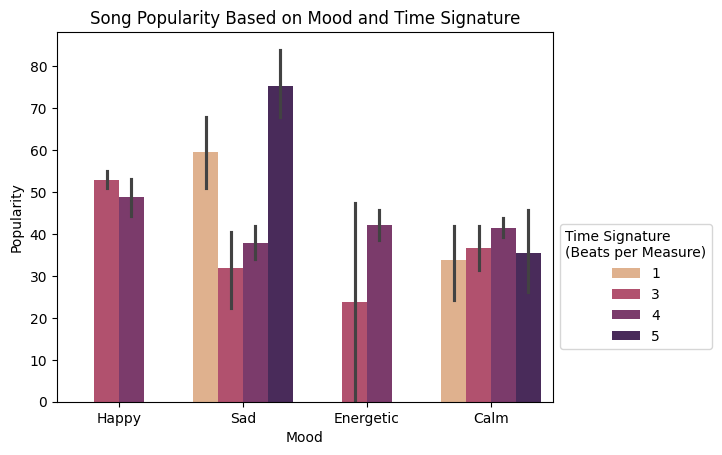

In [5]:
# distinct visualization 1
# barchart for comparison between moods and popularity with time signature hue
ax = sns.barplot(data=music_data, x='mood', y='popularity',
                 hue='time_signature', palette='flare')
ax.set(ylabel='Popularity', xlabel='Mood',
       title='Song Popularity Based on Mood and Time Signature')
plt.legend(title='Time Signature\n(Beats per Measure)',
           bbox_to_anchor=(1, 0.50), loc='upper left')

[Text(0, 0.5, 'Mood'),
 Text(0.5, 0, 'Tempo (Beats Per Min)'),
 Text(0.5, 1.0, 'Song Tempo Dictated By Different Moods')]

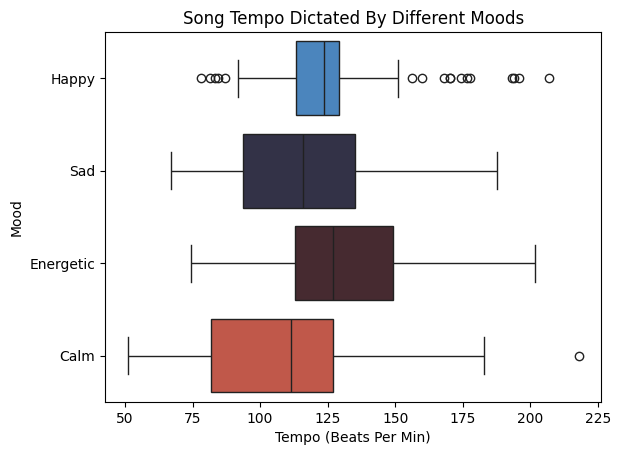

In [6]:
# distinct visualization 2
# boxplot for comparison between tempo of the music and moods
ax = sns.boxplot(data=music_data, x='tempo', y='mood',
                 hue='mood', palette='icefire')
ax.set(ylabel='Mood', xlabel='Tempo (Beats Per Min)',
       title='Song Tempo Dictated By Different Moods')

### Additional Work

In [7]:
# Machine Learning Analysis 3
# Determine the mood of the song (happy/sad/energetic/calm) based on time signature

# Split test and train data
X = music_data['time_signature']
y = music_data['mood']

X_train = X[:620]
X_test = X[620:]

y_train = y[:620]
y_test = y[620:]

# Convert both the X_train and X_test to 2D arrays
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# Convert both y_train and y_test to lists
y_train = y_train.tolist()
y_test = y_test.tolist()

# Baseline comparision
freq_dict = {}

for i in y:
  freq_dict.setdefault(i, 0)
  freq_dict[i] += 1

max_freq = max(freq_dict.values())
max_freq_lst = []

for k, v in freq_dict.items():
  if v == max_freq:
    max_freq_lst.append(k)

mode = max_freq_lst[0]

labels = [mode] * X.shape[0]

correct_pred_cnt = 0

for i in range(len(labels)):
  if labels[i] == y[i]:
    correct_pred_cnt += 1

training_accuracy = correct_pred_cnt/len(y)
print("Training accuracy for baseline is: ", training_accuracy)

# Actual model

clf = svm.SVC(gamma='scale', kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Training accuracy for svm is: ", accuracy)


Training accuracy for baseline is:  0.28717201166180756
Training accuracy for svm is:  0.4393939393939394


For this machine learning model, I used a SVM with linear kernel to determine the mood of songs based on its time signature. I compared this SVM model to a baseline that only predicted the most commonly occurring mood to ensure the SVM 
model was giving good, usable predictions.

From exploration with this model we see that, although this model is more accurate than a simple baseline, it isn't the best model. After experimenting with different factors such as key and time signature, it seems the SVM model with a linear kernel function gave the highest accuracy of about 44% for time signature compared to key suggesting that the provided data is limited in scope to predict features. In this case, more diverse, merged data should be collected or use a different ML model considering various factors for higher predictive accuracy.

### Results

**Discuss inferences or correlations uncovered**

Different moods of music tend to follow a specific pattern when it comes to tempo and time signature. If we analyze the two visualizations, we can see that "Happy" music has a rather narrow range for both. The happy music from the dataset only has time signatures of 3 and 4, and has the narrowest range between the first and third quartiles within the box plot visualization. From this, we can infer that we as humans consider a song to be "happy" only if it follows a particular formula of having the correct rhythm, influenced by tempo and time signature. 

**Discuss the tools (ML models) built**

The tools we built were various ML models that used different musical features to determine the mood of the music as a result of these features. The main features that the ML models built were finding how well the mood of the music can be predicted based on the popularity, tempo, and time signature/key. The ML models used baseline comparisons to compare/contrast with the models accuracy of svm and KNN to determine the predictive accuracy in determining mood. From the ML models built, it appears that tempo had the highest predictive accuracy with the 5-KNN ML model to explain mood compared to other music features.

**Discuss the visualizations created**

There were two visualizations that were created to determine how different music features can explain the mood of the music. The first visualization focused on how song popularity is affected by the mood and time signature of the song which illustrates how "Happy" and "Energetic" songs have limited time signatures being either 3 or 4 beats per measure to create music of this feeling. Another visualization focused on how song tempo can impact different moods to emerge in music where "Happy" songs have limited range of tempos to dictate music to be happy unlike other moods such as sad, energetic, or calm.